# Predict the Automobile Insurance claim

The purpose of an Insurance is to provide protection against the risk of any financial loss. Insurance is a form of risk management in which an insurer agrees to take the risk of the insured entity against future events, uncertain loss due to Tsunami, earthquake or damage against the vehicle or personal property. Here you will be provided with Automobile insurance claim dataset.

One has to predict the claim amount in the Automobile insurance dataset.


 Importing or calling all necessary models

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Dataset
Loading / Cleaning / Formatting

# 1. Predict the claim amount in the Automobile insurance dataset.

In [106]:
df=pd.read_csv('autoclaim.csv')
df

Customer Country State Code     State  Claim Amount Response  Coverage  \
0     BU79786      US         KS    Kansas    276.351928       No     Basic   
1     QZ44356      US         NE  Nebraska    697.953590       No  Extended   
2     AI49188      US         OK  Oklahoma   1288.743165       No   Premium   
3     WW63253      US         MO  Missouri    764.586183       No     Basic   
4     HB64268      US         KS    Kansas    281.369258       No     Basic   
...       ...     ...        ...       ...           ...      ...       ...   
9129  LA72316      US         MO  Missouri   2340.598798       No     Basic   
9130  PK87824      US         MO  Missouri    309.651122      Yes  Extended   
9131  TD14365      US         MO  Missouri    816.389043       No  Extended   
9132  UP19263      US         MO  Missouri    752.444244       No  Extended   
9133  Y167826      US         MO  Missouri    261.183687       No  Extended   

     Education Effective To Date EmploymentStatus  ...  \
0     Bachelor           2/24/11         Employed  ...   
1     Bachelor           1/31/11       Unemployed  ...   
2     Bachelor           2/19/11         Employed  ...   
3     Bachelor           1/20/11       Unemployed  ...   
4     Bachelor            2/3/11         Employed  ...   
...        ...               ...              ...  ...   
9129  Bachelor           2/10/11         Employed  ...   
9130   College           2/12/11         Employed  ...   
9131  Bachelor            2/6/11       Unemployed  ...   
9132   College            2/3/11         Employed  ...   
9133   College           2/14/11       Unemployed  ...   

     Months Since Policy Inception  Number of Open Complaints  \
0                                5                          0   
1                               42                          0   
2                               38                          0   
3                               65                          0   
4                               44                          0   
...                            ...                        ...   
9129                            89                          0   
9130                            28                          0   
9131                            37                          3   
9132                             3                          0   
9133                            90                          0   

     Number of Policies     Policy Type        Policy  Claim Reason  \
0                     1  Corporate Auto  Corporate L3     Collision   
1                     8   Personal Auto   Personal L3  Scratch/Dent   
2                     2   Personal Auto   Personal L3     Collision   
3                     7  Corporate Auto  Corporate L2     Collision   
4                     1   Personal Auto   Personal L1     Collision   
...                 ...             ...           ...           ...   
9129                  2   Personal Auto   Personal L1          Hail   
9130                  1  Corporate Auto  Corporate L3     Collision   
9131                  2  Corporate Auto  Corporate L2     Collision   
9132                  3   Personal Auto   Personal L2  Scratch/Dent   
9133                  1  Corporate Auto  Corporate L3         Other   

      Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0             Agent          384.811147   Two-Door Car      Medsize  
1             Agent         1131.464935  Four-Door Car      Medsize  
2             Agent          566.472247   Two-Door Car      Medsize  
3       Call Center          529.881344            SUV      Medsize  
4             Agent          138.130879  Four-Door Car      Medsize  
...             ...                 ...            ...          ...  
9129            Web          198.234764  Four-Door Car      Medsize  
9130         Branch          379.200000  Four-Door Car      Medsize  
9131         Branch          790.784983  Four-Door Car      Medsize  
9132         Branch      

In [107]:
#Shape of the above dataset:
df.shape

(9134, 26)

In [108]:
#head shows first five rows of the data:
df.head()

Customer Country State Code     State  Claim Amount Response  Coverage  \
0  BU79786      US         KS    Kansas    276.351928       No     Basic   
1  QZ44356      US         NE  Nebraska    697.953590       No  Extended   
2  AI49188      US         OK  Oklahoma   1288.743165       No   Premium   
3  WW63253      US         MO  Missouri    764.586183       No     Basic   
4  HB64268      US         KS    Kansas    281.369258       No     Basic   

  Education Effective To Date EmploymentStatus  ...  \
0  Bachelor           2/24/11         Employed  ...   
1  Bachelor           1/31/11       Unemployed  ...   
2  Bachelor           2/19/11         Employed  ...   
3  Bachelor           1/20/11       Unemployed  ...   
4  Bachelor            2/3/11         Employed  ...   

  Months Since Policy Inception  Number of Open Complaints Number of Policies  \
0                             5                          0                  1   
1                            42                          0                  8   
2                            38                          0                  2   
3                            65                          0                  7   
4                            44                          0                  1   

      Policy Type        Policy  Claim Reason  Sales Channel  \
0  Corporate Auto  Corporate L3     Collision          Agent   
1   Personal Auto   Personal L3  Scratch/Dent          Agent   
2   Personal Auto   Personal L3     Collision          Agent   
3  Corporate Auto  Corporate L2     Collision    Call Center   
4   Personal Auto   Personal L1     Collision          Agent   

   Total Claim Amount  Vehicle Class Vehicle Size  
0          384.811147   Two-Door Car      Medsize  
1         1131.464935  Four-Door Car      Medsize  
2          566.472247   Two-Door Car      Medsize  
3          529.881344            SUV      Medsize  
4          138.130879  Four-Door Car      Medsize  

[5 rows x 26 columns]

In [109]:
#tail shows last five rows of the data:
df.tail()

Customer Country State Code     State  Claim Amount Response  Coverage  \
9129  LA72316      US         MO  Missouri   2340.598798       No     Basic   
9130  PK87824      US         MO  Missouri    309.651122      Yes  Extended   
9131  TD14365      US         MO  Missouri    816.389043       No  Extended   
9132  UP19263      US         MO  Missouri    752.444244       No  Extended   
9133  Y167826      US         MO  Missouri    261.183687       No  Extended   

     Education Effective To Date EmploymentStatus  ...  \
9129  Bachelor           2/10/11         Employed  ...   
9130   College           2/12/11         Employed  ...   
9131  Bachelor            2/6/11       Unemployed  ...   
9132   College            2/3/11         Employed  ...   
9133   College           2/14/11       Unemployed  ...   

     Months Since Policy Inception  Number of Open Complaints  \
9129                            89                          0   
9130                            28                          0   
9131                            37                          3   
9132                             3                          0   
9133                            90                          0   

     Number of Policies     Policy Type        Policy  Claim Reason  \
9129                  2   Personal Auto   Personal L1          Hail   
9130                  1  Corporate Auto  Corporate L3     Collision   
9131                  2  Corporate Auto  Corporate L2     Collision   
9132                  3   Personal Auto   Personal L2  Scratch/Dent   
9133                  1  Corporate Auto  Corporate L3         Other   

      Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
9129            Web          198.234764  Four-Door Car      Medsize  
9130         Branch          379.200000  Four-Door Car      Medsize  
9131         Branch          790.784983  Four-Door Car      Medsize  
9132         Branch          691.200000  Four-Door Car        Large  
9133    Call Center          369.600000   Two-Door Car      Medsize  

[5 rows x 26 columns]

In [110]:
#Information required of the datasets:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   Country                        9134 non-null   object 
 2   State Code                     9134 non-null   object 
 3   State                          9134 non-null   object 
 4   Claim Amount                   9134 non-null   float64
 5   Response                       9134 non-null   object 
 6   Coverage                       9134 non-null   object 
 7   Education                      9134 non-null   object 
 8   Effective To Date              9134 non-null   object 
 9   EmploymentStatus               9134 non-null   object 
 10  Gender                         9134 non-null   object 
 11  Income                         9134 non-null   int64  
 12  Location Code                  9134 non-null   o

In [111]:
#types of the data:
df.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

# Checking Missing Values:

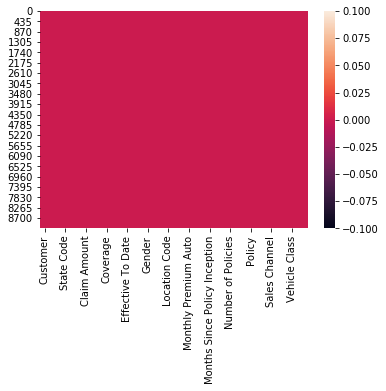

In [112]:
sns.heatmap(df.isnull())

The above graph is here to show that if there are any null values in the above dataset, I have found out that the red color shows the '0' value here, it means that none of the value is emmpty(Null Values).

In order to get more clearity we have taken out the sum of the total Null Values down which is also giving us the same output that is , ' 0 ' .

In [113]:
df.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [114]:
pd.isnull(df).values.any()

False

In [115]:
df.describe

<bound method NDFrame.describe of      Customer Country State Code     State  Claim Amount Response  Coverage  \
0     BU79786      US         KS    Kansas    276.351928       No     Basic   
1     QZ44356      US         NE  Nebraska    697.953590       No  Extended   
2     AI49188      US         OK  Oklahoma   1288.743165       No   Premium   
3     WW63253      US         MO  Missouri    764.586183       No     Basic   
4     HB64268      US         KS    Kansas    281.369258       No     Basic   
...       ...     ...        ...       ...           ...      ...       ...   
9129  LA72316      US         MO  Missouri   2340.598798       No     Basic   
9130  PK87824      US         MO  Missouri    309.651122      Yes  Extended   
9131  TD14365      US         MO  Missouri    816.389043       No  Extended   
9132  UP19263      US         MO  Missouri    752.444244       No  Extended   
9133  Y167826      US         MO  Missouri    261.183687       No  Extended   

     Education Ef

In [116]:
#to review mean, count, minimum and maximum values from the dataset provided:
df.describe()

Claim Amount        Income  Monthly Premium Auto  \
count   9134.000000   9134.000000           9134.000000   
mean     800.494047  37657.380009             93.219291   
std      687.096761  30379.904734             34.407967   
min      189.800768      0.000000             61.000000   
25%      399.425179      0.000000             68.000000   
50%      578.018220  33889.500000             83.000000   
75%      896.216704  62320.000000            109.000000   
max     8332.538119  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       Number of Open Complaints  Number of Policies  Total Claim Amount  
count                9134.000000         9134.000000         9134.000000  
mean                    0.384388            2.966170          434.088794  
std                     0.910384            2.390182          290.500092  
min                     0.000000            1.000000            0.099007  
25%                     0.000000            1.000000          272.258244  
50%                     0.000000            2.000000          383.945434  
75%                     0.000000            4.000000          547.514839  
max                     5.000000            9.000000         2893.239678

The above descriptions states the total count of the entry made that is rows, it also shows the mean , min , max, std 25% and 75% such as , taking in consideration of the claim amount which has 9134 count where mean or average claim amount is 800. Minimum claim amount by the customer is 189 where maximum is 8332.5. It also states the 25% which is 399.4 and 75% 896.2. likewise we could detect other variables too that is income of the customer , monthly premium of the auto for which the insurance have been taken.

In [117]:
#Grouping by dtypes of the given dataset.
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['Income', 'Monthly Premium Auto', 'Months Since Last Claim',
        'Months Since Policy Inception', 'Number of Open Complaints',
        'Number of Policies'],
       dtype='object'),
 dtype('float64'): Index(['Claim Amount', 'Total Claim Amount'], dtype='object'),
 dtype('O'): Index(['Customer', 'Country', 'State Code', 'State', 'Response', 'Coverage',
        'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
        'Location Code', 'Marital Status', 'Policy Type', 'Policy',
        'Claim Reason', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
       dtype='object')}

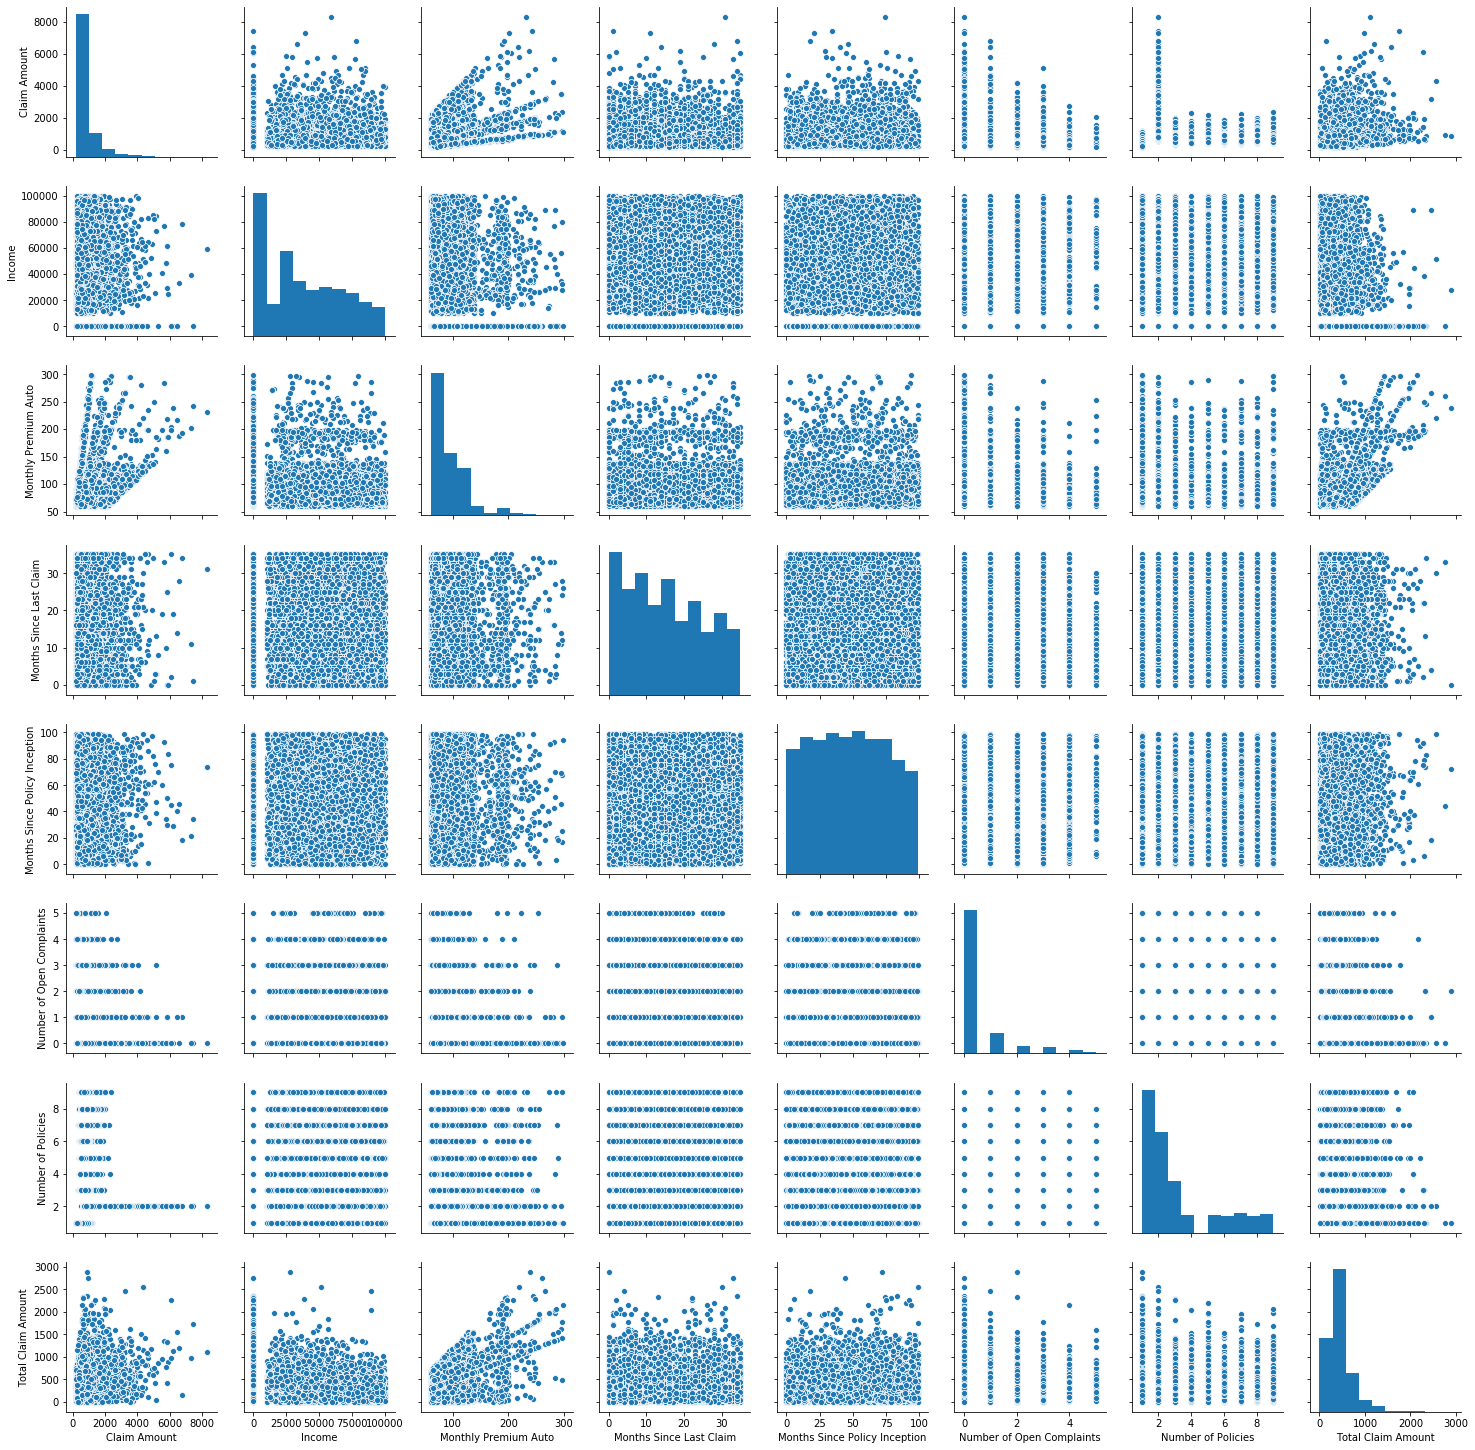

In [118]:
sns.pairplot(df)

Pairplot has been constucted above to show or allow us the see both the distribution of each variables and also to show the relationship between each of the two variables, "/" -->shows the positive corelation where as "" -->shows negative corelation for some there are holizontal lines which shows neutral relationship with each other.

Through the above graph & below graph we have come accros to the attributes or the fields which are positively corelated or neutral corelated to targeted variable that is the claim amount, Hence we would be taking all of them in to the consideration. 

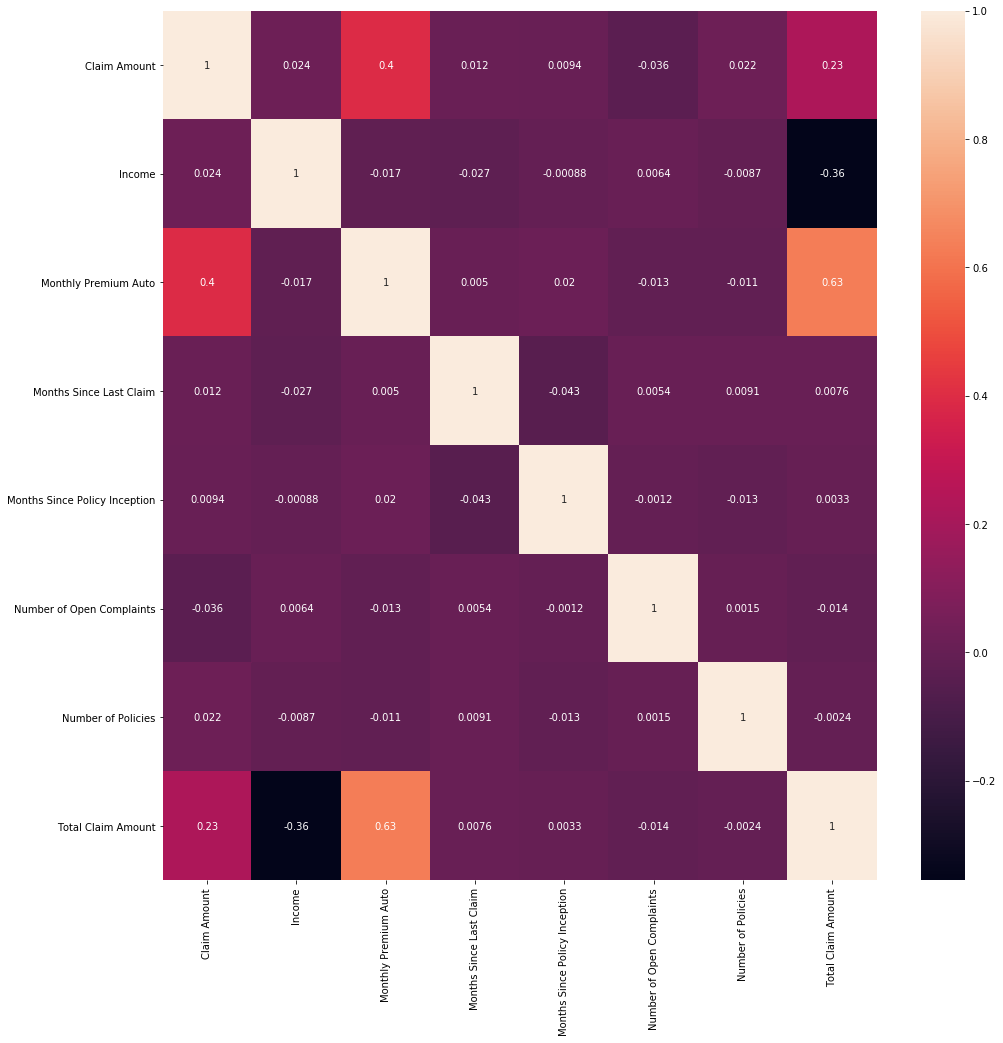

In [119]:
corr_hmap=df.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr_hmap,annot=True)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e8f22b990>,
      dtype=object)

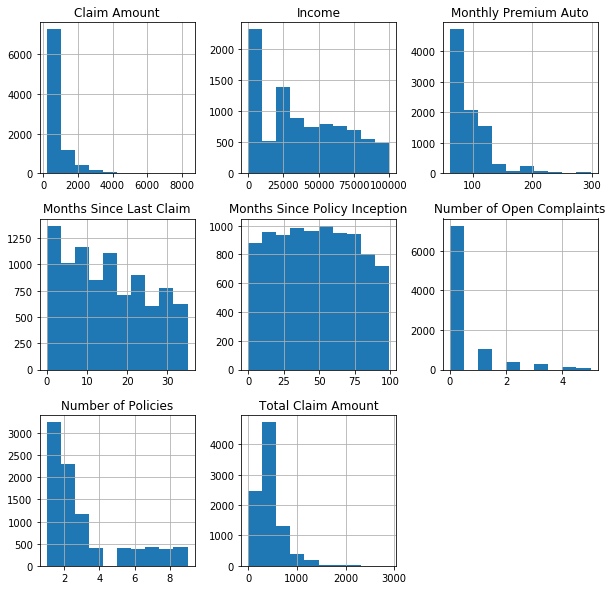

In [120]:
df.hist(figsize=(10,10))

In the above all the histograms shows the count or how the values are distributed to the customers such as :
Around 92% of the customers have the claim amount less than 2000, Around 3500 customers have income less than 25000, Most of the customers pay Monthly premium of the auto below 100 or = 100 , Total claim amount is mostly in the range of 0 to 1000.

Claim Amount                        AxesSubplot(0.125,0.125;0.0824468x0.755)
Income                           AxesSubplot(0.223936,0.125;0.0824468x0.755)
Monthly Premium Auto             AxesSubplot(0.322872,0.125;0.0824468x0.755)
Months Since Last Claim          AxesSubplot(0.421809,0.125;0.0824468x0.755)
Months Since Policy Inception    AxesSubplot(0.520745,0.125;0.0824468x0.755)
Number of Open Complaints        AxesSubplot(0.619681,0.125;0.0824468x0.755)
Number of Policies               AxesSubplot(0.718617,0.125;0.0824468x0.755)
Total Claim Amount               AxesSubplot(0.817553,0.125;0.0824468x0.755)
dtype: object

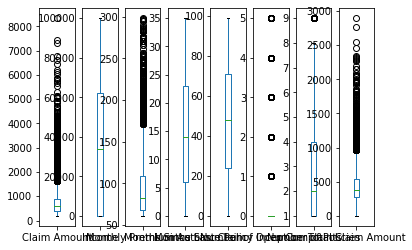

In [121]:
df.plot(kind='box',subplots=True)

The plot box situated above and below are representing the minimum value , maximum value and showing the mean value for the variables. In some of the variables such as:Claim amount, monthly premium auto , Total claim amount, number of open comlaints etc.

The graph shows some poiters above or below the graph which is used to detect if there are any outliers presnt in the datasets or not. If the detection is accurate then we should be able to treat them in order to get the perfect outcome or result.

Outliers here are the observations that we find at the abnormal distance from other values.

In [122]:
#Removing the skewness of the claim amount in the given data
from scipy import stats
stats.mstats.skew(np.log(df['Claim Amount'])).data

array(0.57584613)

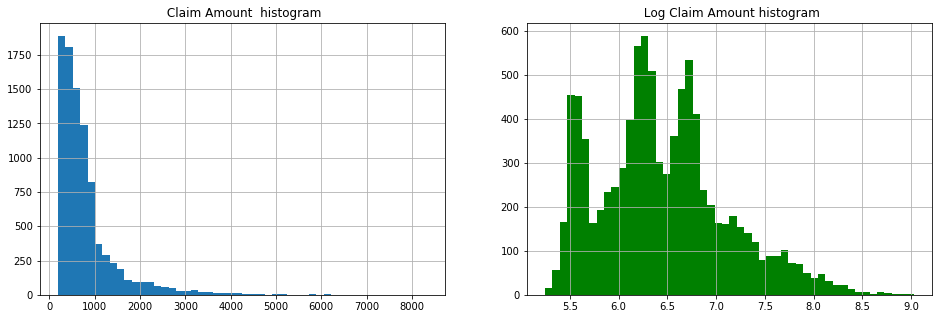

In [123]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16,5)
ax1.hist(df['Claim Amount'], bins=50)
ax1.set_title(' Claim Amount  histogram')
ax1.grid(True)
ax2.hist(np.log(df['Claim Amount']), bins=50, color='g')
ax2.set_title(' Log Claim Amount histogram')
ax2.grid(True)
plt.show()

The above graphs shows the distribution of the claim amount among the customers, where most of the claim amount is below the 1000.

Removing Customer that is a unique ID and removing the country because all the state covered in the US country only. Hence we will be removing these two columns.

In [124]:
df.drop(["Customer","Country"], axis = 1, inplace = True)
df.head()

State Code     State  Claim Amount Response  Coverage Education  \
0         KS    Kansas    276.351928       No     Basic  Bachelor   
1         NE  Nebraska    697.953590       No  Extended  Bachelor   
2         OK  Oklahoma   1288.743165       No   Premium  Bachelor   
3         MO  Missouri    764.586183       No     Basic  Bachelor   
4         KS    Kansas    281.369258       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1   
1                            42                         0                   8   
2                            38                         0                   2   
3                            65                         0                   7   
4                            44                         0                   1   

      Policy Type        Policy  Claim Reason  Sales Channel  \
0  Corporate Auto  Corporate L3     Collision          Agent   
1   Personal Auto   Personal L3  Scratch/Dent          Agent   
2   Personal Auto   Personal L3     Collision          Agent   
3  Corporate Auto  Corporate L2     Collision    Call Center   
4   Personal Auto   Personal L1     Collision          Agent   

  Total Claim Amount  Vehicle Class Vehicle Size  
0         384.811147   Two-Door Car      Medsize  
1        1131.464935  Four-Door Car      Medsize  
2         566.472247   Two-Door Car      Medsize  
3         529.881344            SUV      Medsize  
4         138.130879  Four-Door Car      Medsize  

[5 rows x 24 columns]

In [125]:
#Changing the dtype of the date:
df['Effective To Date'] = df['Effective To Date'].astype('datetime64[ns]')

In [126]:
#Creating seperate column for the year month and day:
def f(x):
    dfdate = x.copy()
    dfdate['year'] = pd.DatetimeIndex(x['Effective To Date']).year
    dfdate['month'] = pd.DatetimeIndex(x['Effective To Date']).month
    dfdate['day'] = pd.DatetimeIndex(x['Effective To Date']).day
    return dfdate
df = f(df)

In [127]:
import datetime
years = df['year']
months = df['month']
days = df['day']

dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months,days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
dates.sort()

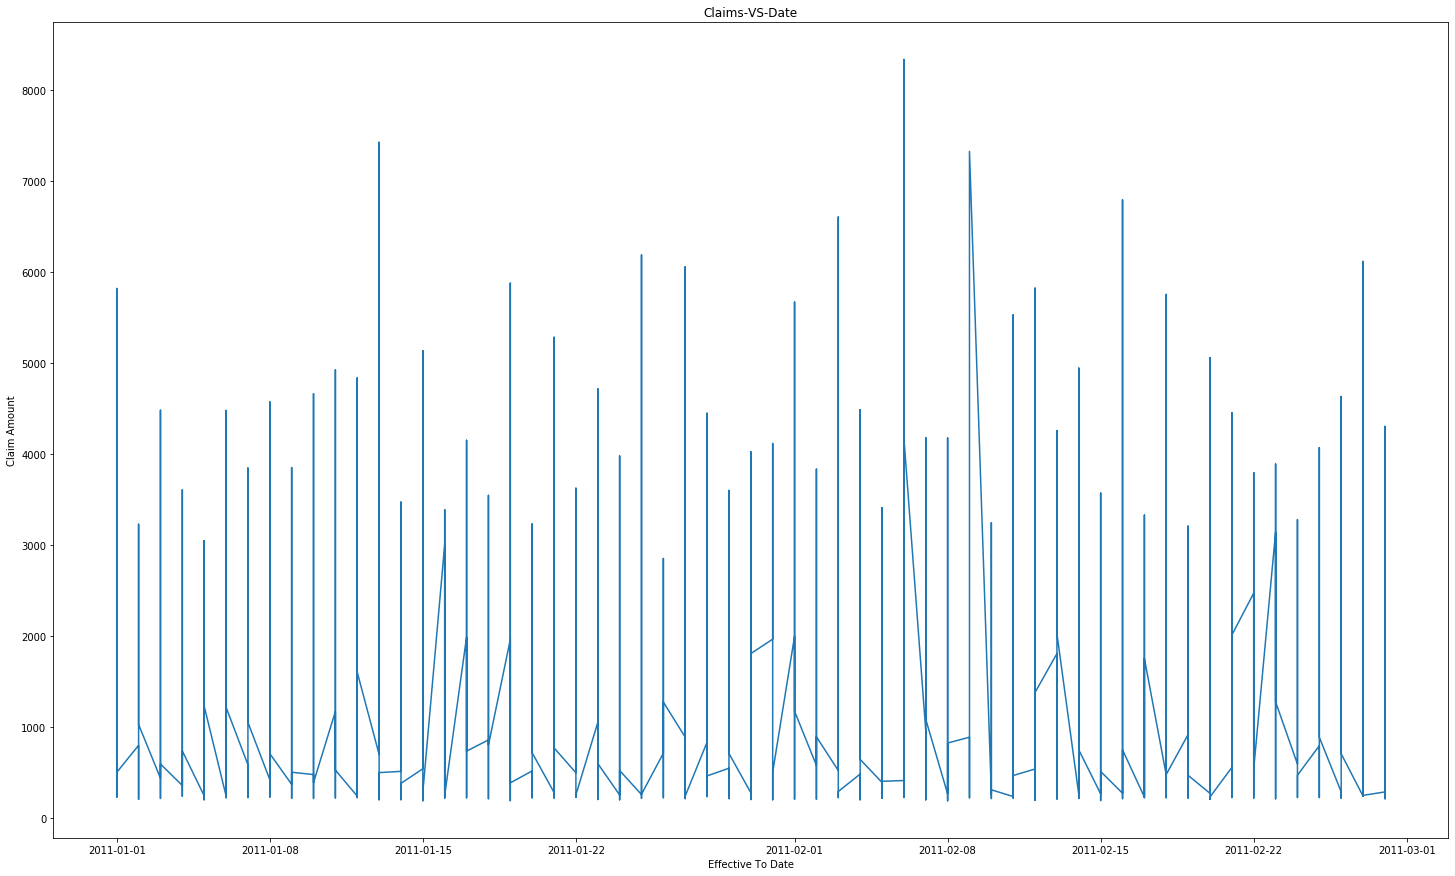

In [128]:
plt.figure(figsize=(25,15))
plt.plot(dates, df['Claim Amount'])
plt.title('Claims-VS-Date')
plt.xlabel('Effective To Date')
plt.ylabel('Claim Amount')
plt.show()

The above graph is showing the relation between claim amount to the effective to the date, if the claim amount is 8000 and its effective date is around 8th feb 2011, through this we can have a clear picture of the claim amount and it effective date.

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   State Code                     9134 non-null   object        
 1   State                          9134 non-null   object        
 2   Claim Amount                   9134 non-null   float64       
 3   Response                       9134 non-null   object        
 4   Coverage                       9134 non-null   object        
 5   Education                      9134 non-null   object        
 6   Effective To Date              9134 non-null   datetime64[ns]
 7   EmploymentStatus               9134 non-null   object        
 8   Gender                         9134 non-null   object        
 9   Income                         9134 non-null   int64         
 10  Location Code                  9134 non-null   object        
 11  Marital Status   

# Label Encoder

In [130]:
from sklearn.preprocessing import LabelEncoder

categorical_features = list(df.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

df.head()

State Code  State  Claim Amount  Response  Coverage  Education  \
0           1      1    276.351928         0         0          0   
1           3      3    697.953590         0         1          0   
2           4      4   1288.743165         0         2          0   
3           2      2    764.586183         0         0          0   
4           1      1    281.369258         0         0          0   

  Effective To Date  EmploymentStatus  Gender  Income  ...  Policy Type  \
0        2011-02-24                 1       0   56274  ...            0   
1        2011-01-31                 4       0       0  ...            1   
2        2011-02-19                 1       0   48767  ...            1   
3        2011-01-20                 4       1       0  ...            0   
4        2011-02-03                 1       1   43836  ...            1   

   Policy  Claim Reason  Sales Channel  Total Claim Amount  Vehicle Class  \
0       2             0              0          384.811147              5   
1       5             3              0         1131.464935              0   
2       5             0              0          566.472247              5   
3       1             0              2          529.881344              3   
4       3             0              0          138.130879              0   

   Vehicle Size  year  month  day  
0             1  2011      2   24  
1             1  2011      1   31  
2             1  2011      2   19  
3             1  2011      1   20  
4             1  2011      2    3  

[5 rows x 27 columns]

In [131]:
df['Policy'].value_counts()

5    3426
4    2122
3    1240
2    1014
1     595
0     359
7     164
8     148
6      66
Name: Policy, dtype: int64

In [132]:
df['EmploymentStatus'].value_counts()

1    5698
4    2317
2     432
0     405
3     282
Name: EmploymentStatus, dtype: int64

In [133]:
#with the help of the label encoder we have changed the object data in to numbers:
#dtpes of the data includes only int , float and datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   State Code                     9134 non-null   int64         
 1   State                          9134 non-null   int64         
 2   Claim Amount                   9134 non-null   float64       
 3   Response                       9134 non-null   int64         
 4   Coverage                       9134 non-null   int64         
 5   Education                      9134 non-null   int64         
 6   Effective To Date              9134 non-null   datetime64[ns]
 7   EmploymentStatus               9134 non-null   int64         
 8   Gender                         9134 non-null   int64         
 9   Income                         9134 non-null   int64         
 10  Location Code                  9134 non-null   int64         
 11  Marital Status   

In [134]:
#Removing the columns which are o no use in predicting the claim amount:
df.drop(["Effective To Date","year","month","day"], axis = 1, inplace = True)
df.head()

State Code  State  Claim Amount  Response  Coverage  Education  \
0           1      1    276.351928         0         0          0   
1           3      3    697.953590         0         1          0   
2           4      4   1288.743165         0         2          0   
3           2      2    764.586183         0         0          0   
4           1      1    281.369258         0         0          0   

   EmploymentStatus  Gender  Income  Location Code  ...  \
0                 1       0   56274              1  ...   
1                 4       0       0              1  ...   
2                 1       0   48767              1  ...   
3                 4       1       0              1  ...   
4                 1       1   43836              0  ...   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies  Policy Type  Policy  Claim Reason  Sales Channel  \
0                   1            0       2             0              0   
1                   8            1       5             3              0   
2                   2            1       5             0              0   
3                   7            0       1             0              2   
4                   1            1       3             0              0   

   Total Claim Amount  Vehicle Class  Vehicle Size  
0          384.811147              5             1  
1         1131.464935              0             1  
2          566.472247              5             1  
3          529.881344              3             1  
4          138.130879              0             1  

[5 rows x 23 columns]

# Changing the columns:
Bringing the Claim Amount	 column to the first in order to ease our processing.

In [135]:
mid = df['Claim Amount']
df.drop(labels=['Claim Amount'], axis=1, inplace = True)
df.insert(0, 'Claim Amount', mid)
df.head()

Claim Amount  State Code  State  Response  Coverage  Education  \
0    276.351928           1      1         0         0          0   
1    697.953590           3      3         0         1          0   
2   1288.743165           4      4         0         2          0   
3    764.586183           2      2         0         0          0   
4    281.369258           1      1         0         0          0   

   EmploymentStatus  Gender  Income  Location Code  ...  \
0                 1       0   56274              1  ...   
1                 4       0       0              1  ...   
2                 1       0   48767              1  ...   
3                 4       1       0              1  ...   
4                 1       1   43836              0  ...   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies  Policy Type  Policy  Claim Reason  Sales Channel  \
0                   1            0       2             0              0   
1                   8            1       5             3              0   
2                   2            1       5             0              0   
3                   7            0       1             0              2   
4                   1            1       3             0              0   

   Total Claim Amount  Vehicle Class  Vehicle Size  
0          384.811147              5             1  
1         1131.464935              0             1  
2          566.472247              5             1  
3          529.881344              3             1  
4          138.130879              0             1  

[5 rows x 23 columns]

# Assigning X AND Y Variables:

In [136]:
x=df.iloc[:,1:24]
x.shape
x

State Code  State  Response  Coverage  Education  EmploymentStatus  \
0              1      1         0         0          0                 1   
1              3      3         0         1          0                 4   
2              4      4         0         2          0                 1   
3              2      2         0         0          0                 4   
4              1      1         0         0          0                 1   
...          ...    ...       ...       ...        ...               ...   
9129           2      2         0         0          0                 1   
9130           2      2         1         1          1                 1   
9131           2      2         0         1          0                 4   
9132           2      2         0         1          1                 1   
9133           2      2         0         1          1                 4   

      Gender  Income  Location Code  Marital Status  ...  \
0          0   56274              1               1  ...   
1          0       0              1               2  ...   
2          0   48767              1               1  ...   
3          1       0              1               1  ...   
4          1   43836              0               2  ...   
...      ...     ...            ...             ...  ...   
9129       1   71941              2               1  ...   
9130       0   21604              1               0  ...   
9131       1       0              1               2  ...   
9132       1   21941              1               1  ...   
9133       1       0              1               2  ...   

      Months Since Policy Inception  Number of Open Complaints  \
0                                 5                          0   
1                                42                          0   
2                                38                          0   
3                                65                          0   
4                                44                          0   
...                             ...                        ...   
9129                             89                          0   
9130                             28                          0   
9131                             37                          3   
9132                              3                          0   
9133                             90                          0   

      Number of Policies  Policy Type  Policy  Claim Reason  Sales Channel  \
0                      1            0       2             0              0   
1                      8            1       5             3              0   
2                      2            1       5             0              0   
3                      7            0       1             0              2   
4                      1            1       3             0              0   
...                  ...          ...     ...           ...            ...   
9129                   2            1       3             1              3   
9130                   1            0       2             0              1   
9131                   2            0       1             0              1   
9132                   3            1       4             3              1   
9133                   1            0       2             2              2   

      Total Claim Amount  Vehicle Class  Vehicle Size  
0             384.811147              5             1  
1            1131.464935              0             1  
2             566.472247              5             1  
3             529.881344              3             1  
4             138.130879              0             1  
...                  ...            ...           ...  
9129          198.234764              0             1  
9130          379.200000              0             1  
9131          790.784983              0             1  
9132          691.200000              0             0  
9133          369.600000  

In [137]:
y=df.iloc[:,0:1]
y.shape
y.head()

Claim Amount
0    276.351928
1    697.953590
2   1288.743165
3    764.586183
4    281.369258

# Using Standard Scaler:
To bring all the values at the same scale:

In [138]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(copy=True, with_mean=True, with_std=True).fit(x)
df1_x_scaler = scaler.transform(x)
x = pd.DataFrame(df1_x_scaler)
x.head()

0         1         2         3         4         5         6   \
0 -0.550690 -0.550690 -0.408822 -0.732899 -1.124597 -0.612669 -0.980269   
1  0.973322  0.973322 -0.408822  0.791999 -1.124597  1.613313 -0.980269   
2  1.735328  1.735328 -0.408822  2.316897 -1.124597 -0.612669 -0.980269   
3  0.211316  0.211316 -0.408822 -0.732899 -1.124597  1.613313  1.020128   
4 -0.550690 -0.550690 -0.408822 -0.732899 -1.124597 -0.612669  1.020128   

         7         8         9   ...        12       13        14        15  \
0  0.612827  0.034524 -0.188771  ... -1.543287 -0.42225 -0.822648 -1.735273   
1 -1.239617  0.034524  1.381572  ... -0.217334 -0.42225  2.106160  0.365732   
2  0.365710  0.034524 -0.188771  ... -0.360680 -0.42225 -0.404247  0.365732   
3 -1.239617  0.034524 -0.188771  ...  0.606907 -0.42225  1.687759 -1.735273   
4  0.203390 -1.616461  1.381572  ... -0.145661 -0.42225 -0.822648  0.365732   

         16        17        18        19        20        21  
0 -1.119497 -0.946485 -1.031138 -0.169640  1.499181 -0.166682  
1  0.748626  1.851312 -1.031138  2.400737 -0.912924 -0.166682  
2  0.748626 -0.946485 -1.031138  0.455734  1.499181 -0.166682  
3 -1.742204 -0.946485  0.839080  0.329769  0.534339 -0.166682  
4 -0.496789 -0.946485 -1.031138 -1.018843 -0.912924 -0.166682  

[5 rows x 22 columns]

In [139]:
x.shape


(9134, 22)

In [140]:
pd.DataFrame(x)

0         1         2         3         4         5         6   \
0    -0.550690 -0.550690 -0.408822 -0.732899 -1.124597 -0.612669 -0.980269   
1     0.973322  0.973322 -0.408822  0.791999 -1.124597  1.613313 -0.980269   
2     1.735328  1.735328 -0.408822  2.316897 -1.124597 -0.612669 -0.980269   
3     0.211316  0.211316 -0.408822 -0.732899 -1.124597  1.613313  1.020128   
4    -0.550690 -0.550690 -0.408822 -0.732899 -1.124597 -0.612669  1.020128   
...        ...       ...       ...       ...       ...       ...       ...   
9129  0.211316  0.211316 -0.408822 -0.732899 -1.124597 -0.612669  1.020128   
9130  0.211316  0.211316  2.446054  0.791999 -0.400957 -0.612669 -0.980269   
9131  0.211316  0.211316 -0.408822  0.791999 -1.124597  1.613313  1.020128   
9132  0.211316  0.211316 -0.408822  0.791999 -0.400957 -0.612669  1.020128   
9133  0.211316  0.211316 -0.408822  0.791999 -0.400957  1.613313  1.020128   

            7         8         9   ...        12        13        14  \
0     0.612827  0.034524 -0.188771  ... -1.543287 -0.422250 -0.822648   
1    -1.239617  0.034524  1.381572  ... -0.217334 -0.422250  2.106160   
2     0.365710  0.034524 -0.188771  ... -0.360680 -0.422250 -0.404247   
3    -1.239617  0.034524 -0.188771  ...  0.606907 -0.422250  1.687759   
4     0.203390 -1.616461  1.381572  ... -0.145661 -0.422250 -0.822648   
...        ...       ...       ...  ...       ...       ...       ...   
9129  1.128558  1.685508 -0.188771  ...  1.466984 -0.422250 -0.404247   
9130 -0.528450  0.034524 -1.759114  ... -0.719046 -0.422250 -0.822648   
9131 -1.239617  0.034524  1.381572  ... -0.396517  2.873245 -0.404247   
9132 -0.517356  0.034524 -0.188771  ... -1.614960 -0.422250  0.014154   
9133 -1.239617  0.034524  1.381572  ...  1.502821 -0.422250 -0.822648   

            15        16        17        18        19        20        21  
0    -1.735273 -1.119497 -0.946485 -1.031138 -0.169640  1.499181 -0.166682  
1     0.365732  0.748626  1.851312 -1.031138  2.400737 -0.912924 -0.166682  
2     0.365732  0.748626 -0.946485 -1.031138  0.455734  1.499181 -0.166682  
3    -1.735273 -1.742204 -0.946485  0.839080  0.329769  0.534339 -0.166682  
4     0.365732 -0.496789 -0.946485 -1.031138 -1.018843 -0.912924 -0.166682  
...        ...       ...       ...       ...       ...       ...       ...  
9129  0.365732 -0.496789 -0.013886  1.774189 -0.811934 -0.912924 -0.166682  
9130 -1.735273 -1.119497 -0.946485 -0.096029 -0.188956 -0.912924 -0.166682  
9131 -1.735273 -1.742204 -0.946485 -0.096029  1.227937 -0.912924 -0.166682  
9132  0.365732  0.125919  1.851312 -0.096029  0.885113 -0.912924 -2.027897  
9133 -1.735273 -1.119497  0.918713  0.839080 -0.222004  1.499181 -0.166682  

[9134 rows x 22 columns]

# MODEL SELECTION
Using different types of model in oder to acquire optimum solution:

# Lasso

In [141]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
isreh=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
grid=GridSearchCV(isreh,parameters,cv=10)
grid.fit(x,y)
grid.best_params_

{'alpha': 1}

In [142]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=r_state)
    lasso=Lasso(alpha=1)
    lasso.fit(x_train,y_train)
    y_pred=lasso.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)

r2_score corresponding to random state:  42 is:  0.15460457172701247
r2_score corresponding to random state:  43 is:  0.15118034793838742
r2_score corresponding to random state:  44 is:  0.14273097360891407
r2_score corresponding to random state:  45 is:  0.1562736047529084
r2_score corresponding to random state:  46 is:  0.17647380108596478
r2_score corresponding to random state:  47 is:  0.18413792800615525
r2_score corresponding to random state:  48 is:  0.18482305893573403
r2_score corresponding to random state:  49 is:  0.16985324875644847
r2_score corresponding to random state:  50 is:  0.176227532008989
r2_score corresponding to random state:  51 is:  0.1275176003647025
r2_score corresponding to random state:  52 is:  0.1583385458493881
r2_score corresponding to random state:  53 is:  0.1578321909088899
r2_score corresponding to random state:  54 is:  0.12762320228430668
r2_score corresponding to random state:  55 is:  0.17142937474196296
r2_score corresponding to random state: 

In [143]:
from sklearn.svm import SVC

def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=r_state)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print()
    print()
    print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)
    return final_r_state

# LinearRegression

In [144]:
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)


r2_score corresponding to random state:  42 is:  0.1548021764742975
r2_score corresponding to random state:  43 is:  0.15134553545823604
r2_score corresponding to random state:  44 is:  0.14228019517706259
r2_score corresponding to random state:  45 is:  0.1561543394780578
r2_score corresponding to random state:  46 is:  0.17644761683965915
r2_score corresponding to random state:  47 is:  0.18462200342680568
r2_score corresponding to random state:  48 is:  0.18515818389994954
r2_score corresponding to random state:  49 is:  0.16967648143870762
r2_score corresponding to random state:  50 is:  0.17592532764440671
r2_score corresponding to random state:  51 is:  0.1273935627714623
r2_score corresponding to random state:  52 is:  0.1576631618169705
r2_score corresponding to random state:  53 is:  0.15724459308501804
r2_score corresponding to random state:  54 is:  0.12718304629191823
r2_score corresponding to random state:  55 is:  0.17156498387181918
r2_score corresponding to random state

# KNeighborsRegressor

In [145]:
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knn= KNeighborsRegressor()
gknn=GridSearchCV(knn,neighbors,cv=10)
gknn.fit(x,y)
gknn.best_params_

{'n_neighbors': 26}

In [146]:
knn= KNeighborsRegressor(n_neighbors=26)
r_state=maxr2_score(knn,x,y)

r2_score corresponding to random state:  42 is:  0.13262109295924263
r2_score corresponding to random state:  43 is:  0.13327951827547058
r2_score corresponding to random state:  44 is:  0.1502255092538114
r2_score corresponding to random state:  45 is:  0.16721719840458127
r2_score corresponding to random state:  46 is:  0.15328881747997014
r2_score corresponding to random state:  47 is:  0.16278730765224103
r2_score corresponding to random state:  48 is:  0.16501839655597772
r2_score corresponding to random state:  49 is:  0.17328749079561367
r2_score corresponding to random state:  50 is:  0.15685162881241532
r2_score corresponding to random state:  51 is:  0.14155482803700037
r2_score corresponding to random state:  52 is:  0.13451785038536834
r2_score corresponding to random state:  53 is:  0.16662214043707746
r2_score corresponding to random state:  54 is:  0.141317340615281
r2_score corresponding to random state:  55 is:  0.1827678360220819
r2_score corresponding to random state

# Errors

In [147]:
print('Mean absolute error : ',mean_absolute_error(y_test,y_pred))
print('Mean Squared error : ',mean_squared_error(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

Mean absolute error :  391.15098533141384
Mean Squared error :  410799.587454968
RMSE is :  640.936492528681


# RandomForestRegressor

In [148]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train, y_train)
rf.score(x_train,y_train)
pred=rf.predict(x_test)
pred

array([ 364.34723456,  434.25324957, 1049.0772076 , ..., 1930.41924312,
       2205.10291727,  908.00003368])

In [149]:
rf.score(x_train,y_train)

0.9572888546646844

cross_val_score

In [150]:
print()
print()
print("Mean r2 score for RandomForestRegressor: ",cross_val_score(rf,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for RandomForestRegressor: ",cross_val_score(rf,x,y,cv=5,scoring="r2").std())
print()
print()



Mean r2 score for RandomForestRegressor:  0.6986393301982343
Standard Deviation r2 score for RandomForestRegressor:  0.008849846922266359




# Choosing a model

I am going to choose Random Forest Regressor as my final and the best model as it is predicting the highest accuracy score i.e. 95.72% which is highest among all the model tested above. 
Therefore Random Forest Regressor is going to predict the best result for us.

# Saving the file:

In [151]:
from sklearn.externals import joblib

In [152]:
joblib.dump(rf,'Project_11_Automobile_Insurance_claim_Analysis_1.obj')

['Project_11_Automobile_Insurance_claim_Analysis_1.obj']

In [153]:
#loading back the model:
model=joblib.load('Project_11_Automobile_Insurance_claim_Analysis_1.obj')

In [154]:
#Pridicting x_test Random Forest Regressor = rf
rf.predict(x_test)

array([ 364.34723456,  434.25324957, 1049.0772076 , ..., 1930.41924312,
       2205.10291727,  908.00003368])

# Dataset
Loading / Cleaning / Formatting

# 2. Predict the insurance fraud  in the Automobile insurance dataset.

In [155]:
#Loading the fraud data:
dff=pd.read_csv('autofraud..csv')
dff

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [156]:
#shape of the data in rows and column
dff.shape

(1000, 40)

In [157]:
#first five lines of the given data
dff.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [158]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [159]:
dff.describe

<bound method NDFrame.describe of      months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy

In [160]:
#to review mean, count, minimum and maximum values from the data:
dff.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

The total count in the dataset is 100 , 
Average age is 38 years and maximum age is 64years,
Also we could see that the average total claim amount, capital loss and gains etc..

In [161]:
#data types of all the variables
dff.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [162]:
#value count of the fraud details i.e. yes or no..:
dff["fraud_reported"].value_counts().sort_index()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [163]:
#there is no value in the _c39 variable thus it is of no use:
dff._c39.unique()

array([nan])

In [164]:
# There is onlu nan value in the last column _c39 which is of no use , Hence we will remove it right ahead.
dff.drop(["_c39"], axis = 1, inplace = True)
dff.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     YES              71610   
1       468176  ...         0                       ?               5070   
2       430632  ...         3                      NO              34650   
3       608117  ...         2                      NO              63400   
4       610706  ...         1                      NO               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   
2         7700           3850          23100      Dodge        RAM      2007   
3         6340           6340          50720  Chevrolet      Tahoe      2014   
4         1300            650           4550     Accura        RSX      2009   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N  

[5 rows x 39 columns]

In [165]:
#value count of the police_report_available 
dff["police_report_available"].value_counts().sort_index()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [166]:
dff["auto_year"].value_counts().sort_index()

1995    56
1996    37
1997    46
1998    40
1999    55
2000    42
2001    42
2002    49
2003    51
2004    39
2005    54
2006    53
2007    52
2008    45
2009    50
2010    50
2011    53
2012    46
2013    49
2014    44
2015    47
Name: auto_year, dtype: int64

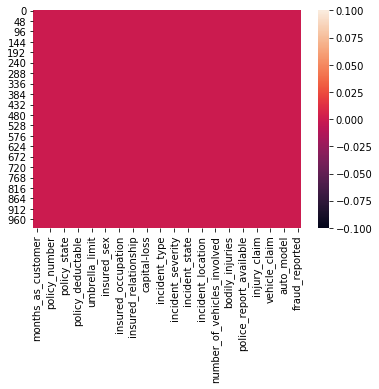

In [167]:
sns.heatmap(dff.isnull())


The above graph is here to show that if there are any null values in the above dataset, I have found out that the red color shows the '0' value here, it means that none of the value is emmpty(Null Values).

In order to get more clearity we have taken out the sum of the total Null Values down which is also giving us the same output that is , ' 0 ' .

In [168]:
dff.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

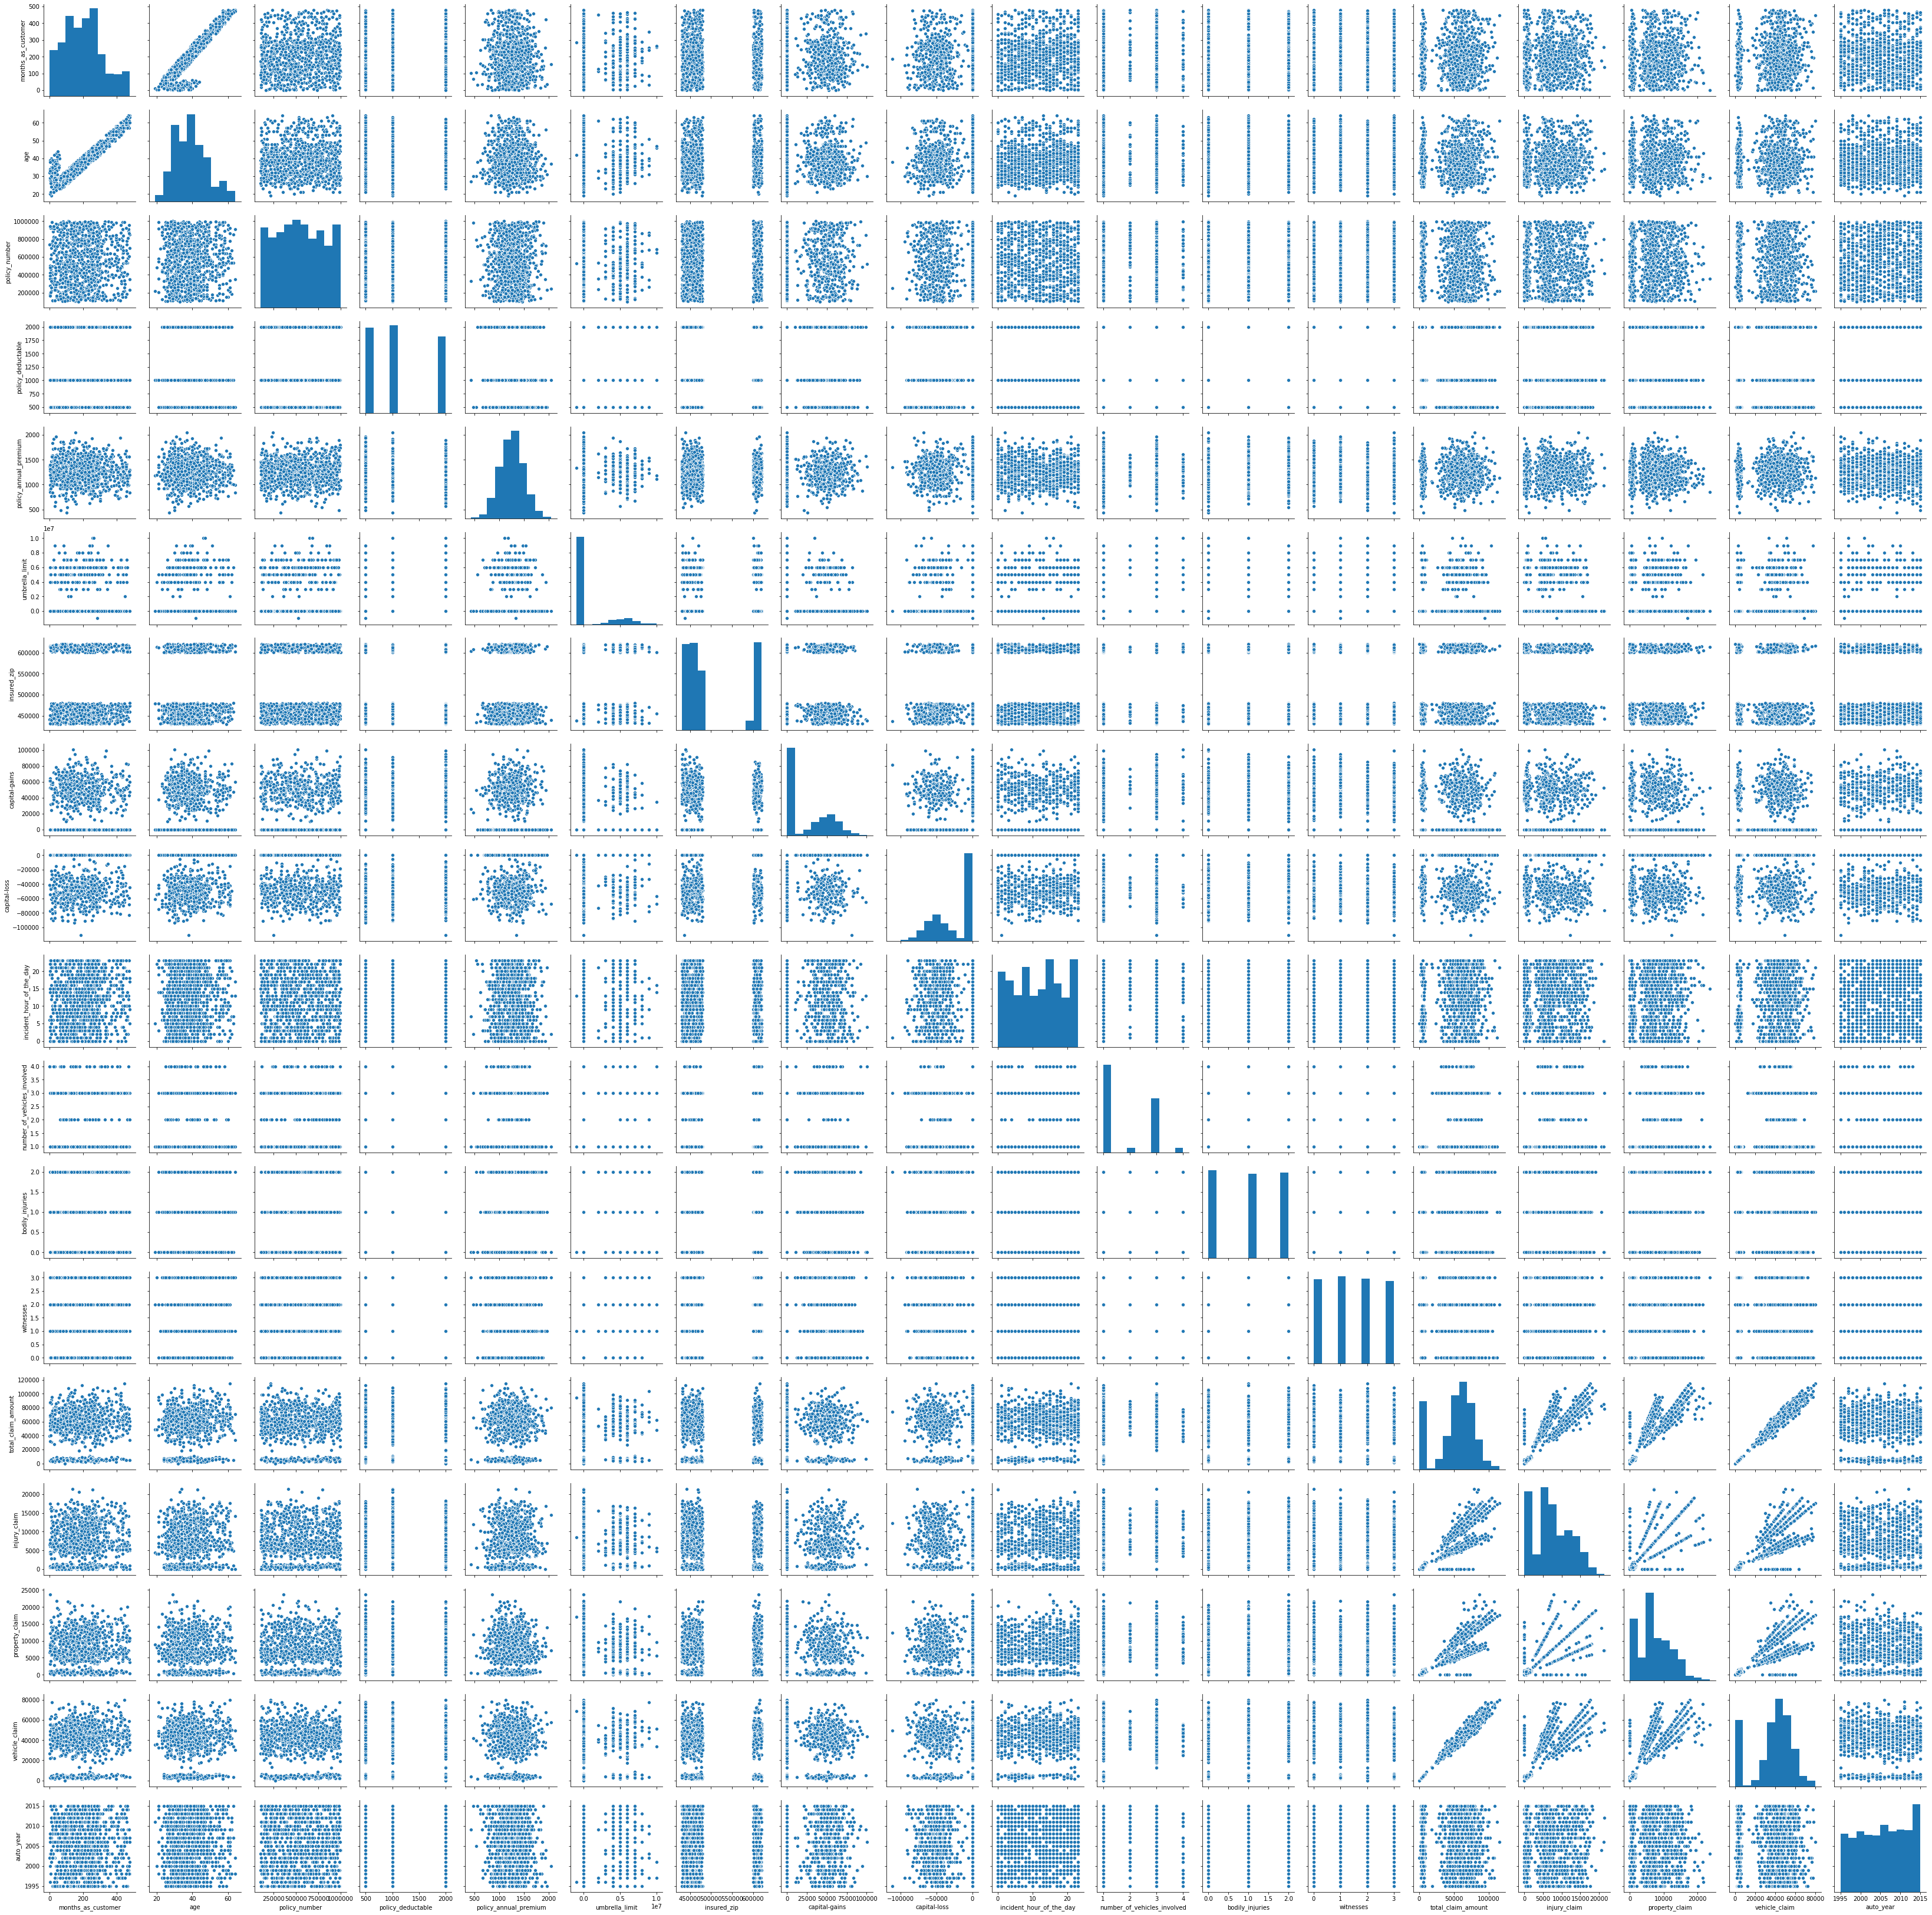

In [169]:
sns.pairplot(dff)


Pairplot has been constucted above to show or allow us the see both the distribution of each variables and also to show the relationship between each of the two variables, "/" -->shows the positive corelation where as "\" -->shows negative corelation for some there are holizontal lines which shows neutral relationship with each other.

Through the above and below graph we have come accros to the attributes or the fields which are positively corelated or neutral corelated to each other, Hence we would be taking all of them in to the consideration.

These fields are some what showing neutral correlation with each other. The below graph shows is the stucture of corelation between each of the variables with respect to the heatmap.The black dots represent negative corelation where as off white color shows the positive corelation.

There are field which are showing strongly negative relationship, hence we will be removing "No. of vehicle involved" and "capital-loss" .



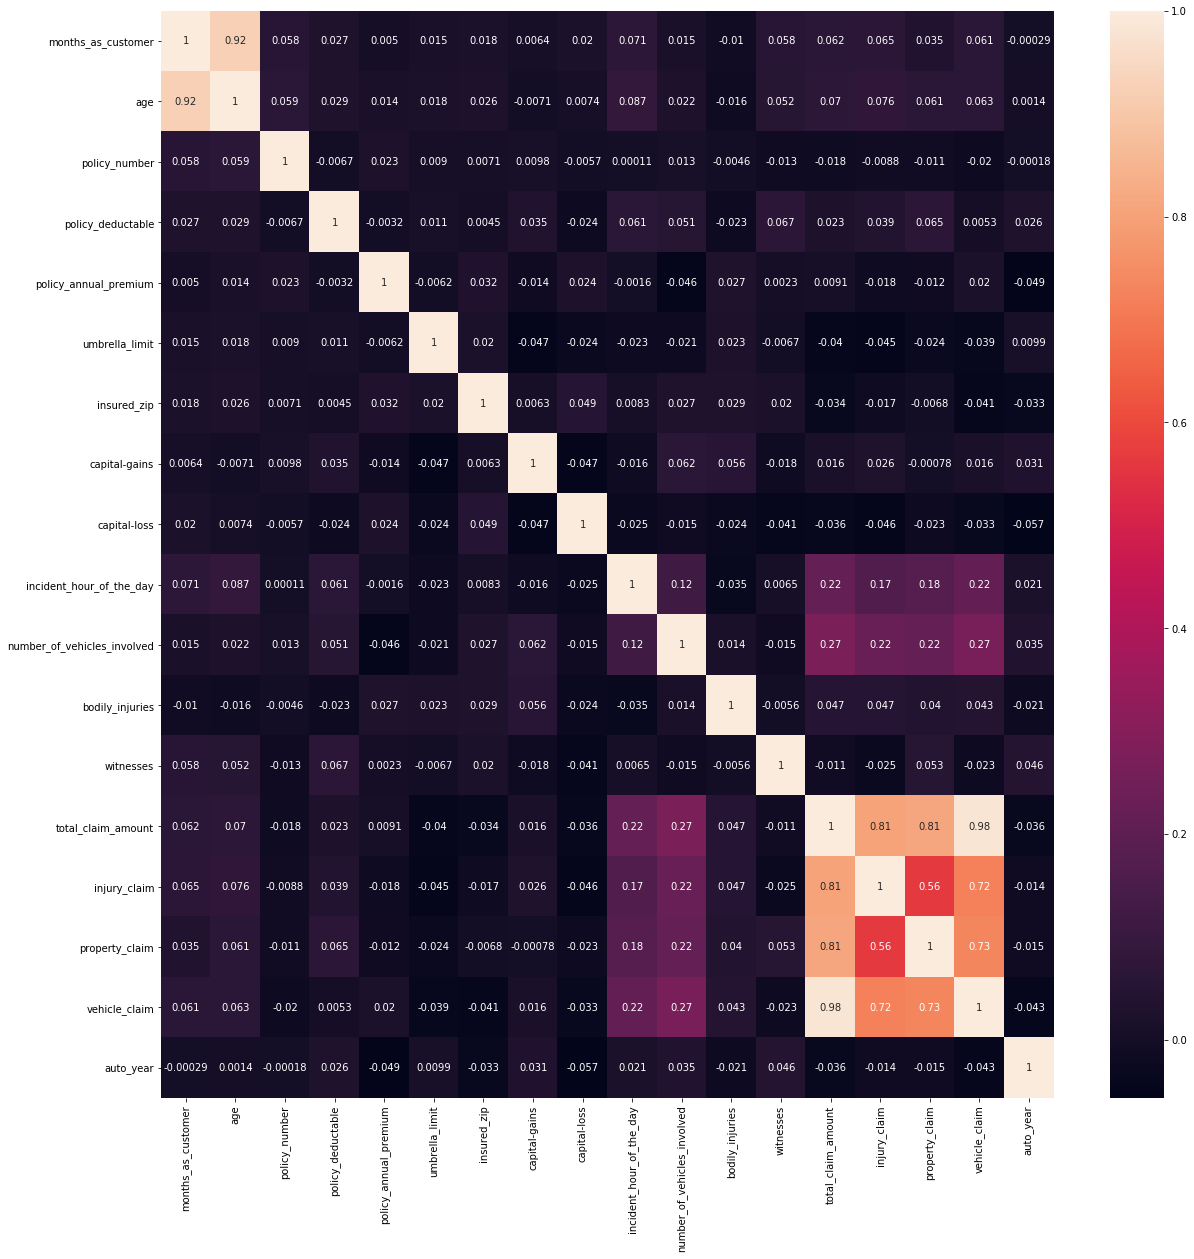

In [170]:
corr_hmap=dff.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_hmap,annot=True)
plt.show()

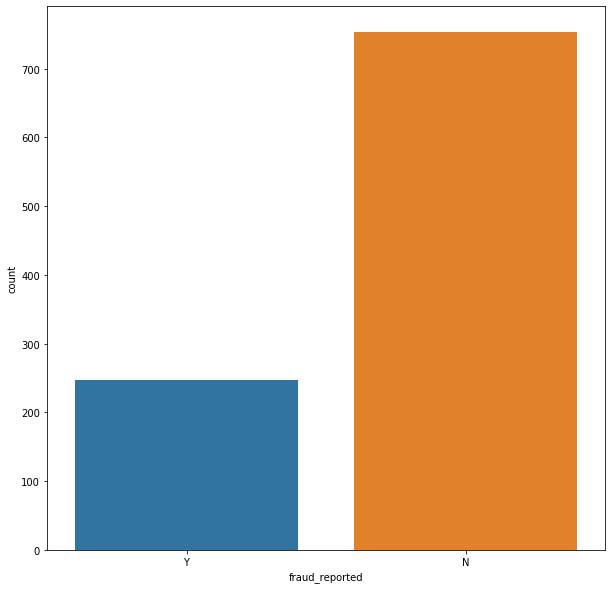

In [171]:
plt.subplots(figsize=(10, 10))
sns.countplot(x='fraud_reported',data=dff)

As per the above graph we can see that there is all most 75 % of the fraud reported cases has been reported as NO, other 25% is YES.

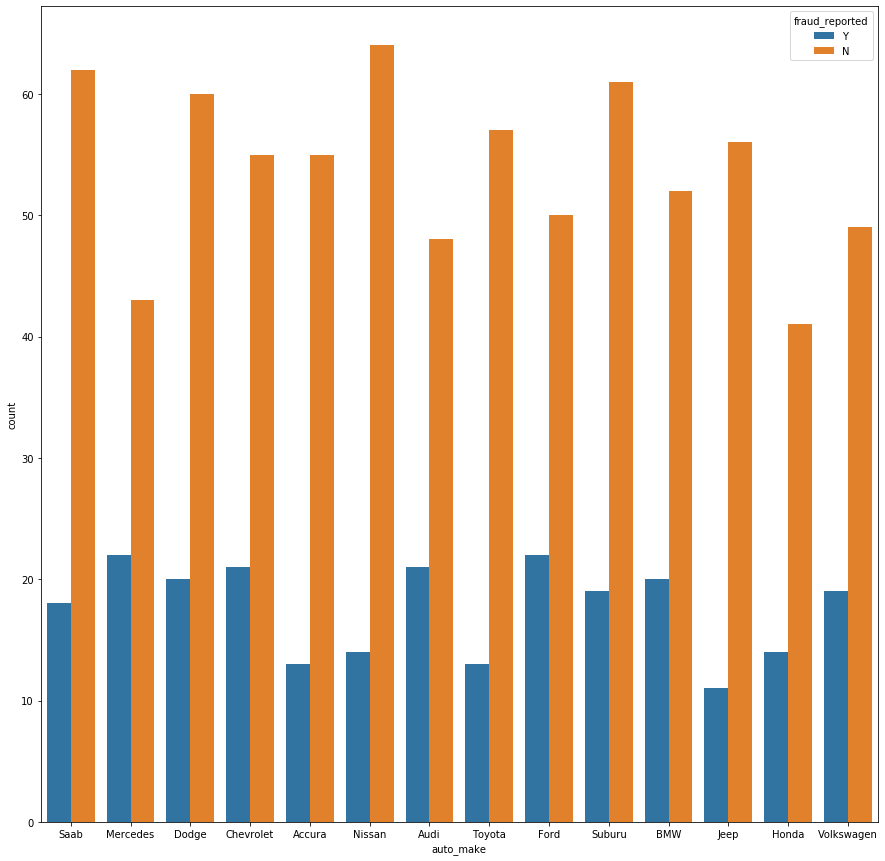

In [172]:
plt.subplots(figsize=(15, 15))
sns.countplot(x='auto_make',hue='fraud_reported',data=dff)

The above graph shows that the top 3 auto make where the fraud was reported as YES are as follows:

Mercedes,Ford,Audi,Chevrolet

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e6bd53b10>,
      dtype=object)

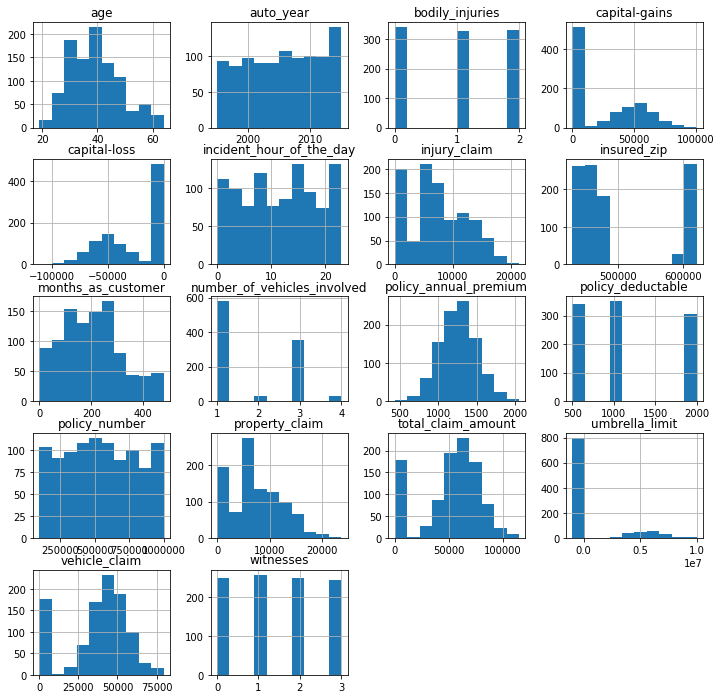

In [173]:
dff.hist(figsize=(12,12))

The above grapgh shows the distribution of variables among the customers:
Most of the customers age is between the range of 25 to 50, around 75 % of the cases are reported as no fraud, most of the cases have injury claim less than 10000,most off the cases have total claim amount of more than 50000, we could also see that the maximum numbe of cases has policy annual premium in the range of 1000 to 1500. Likewise we could also see the details of other variables also.

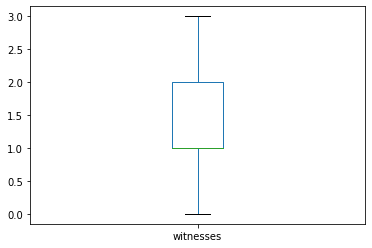

In [174]:
dff['witnesses'].plot.box()

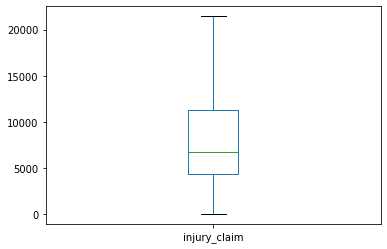

In [175]:
dff['injury_claim'].plot.box()

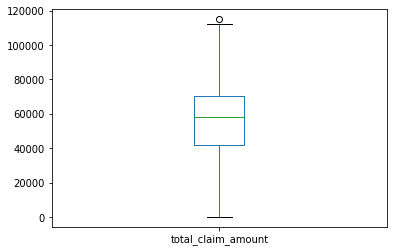

In [176]:
dff['total_claim_amount'].plot.box()

The plot box situated above and below are representing the minimum value , maximum value and showing the mean value for the variables. In some of the variables such as total_claim_amount.

The graph shows some poiters above or below the graph which is used to detect if there are any outliers presnt in the datasets or not. If the detection is accurate then we should be able to treat them in order to get the perfect outcome or result.

Outliers here are the observations that we find at the abnormal distance from other values.

# Label Encoder:

In [177]:
from sklearn.preprocessing import LabelEncoder

categorical_features = list(dff.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    dff[feature] = label_encoder_feat[feature].fit_transform(dff[feature])

dff.head()

months_as_customer  age  policy_number  policy_bind_date  policy_state  \
0                 328   48         521585               532             2   
1                 228   42         342868               821             1   
2                 134   29         687698               186             2   
3                 256   41         227811               766             0   
4                 228   44         367455               181             0   

   policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0           1               1000                1406.91               0   
1           1               2000                1197.22         5000000   
2           0               2000                1413.14         5000000   
3           1               2000                1415.74         6000000   
4           2               1000                1583.91         6000000   

   insured_zip  ...  witnesses  police_report_available  total_claim_amount  \
0       466132  ...          2                        2               71610   
1       468176  ...          0                        0                5070   
2       430632  ...          3                        1               34650   
3       608117  ...          2                        1               63400   
4       610706  ...          1                        1                6500   

   injury_claim  property_claim  vehicle_claim  auto_make  auto_model  \
0          6510           13020          52080         10           1   
1           780             780           3510          8          12   
2          7700            3850          23100          4          30   
3          6340            6340          50720          3          34   
4          1300             650           4550          0          31   

   auto_year  fraud_reported  
0       2004               1  
1       2007               1  
2       2007               0  
3       2014               1  
4       2009               0  

[5 rows x 39 columns]

# Removing Colums:

In [178]:
dff.drop(["policy_number","auto_year","number_of_vehicles_involved"], axis = 1, inplace = True)

In [179]:
dff.drop(["capital-loss"], axis = 1, inplace = True)

I have removed 4 columns from the above data set as they are not in use and not correlating: policy_number,auto_year,number_of_vehicles_involved,capital-loss.

# Removing Outliers:

In [180]:
from scipy.stats import zscore
z_score=abs(zscore(dff))
print(dff.shape)

(1000, 35)


In [181]:
dfr=dff.loc[(z_score<3).all(axis=1)]
print(dfr.shape)

(981, 35)


After treating the dataset with zscore we have removed 19 rows from the dataset, now our shape is 981,35

In [182]:
#There is no skewness in the below data:
dfr.skew()

months_as_customer          0.363268
age                         0.475942
policy_bind_date            0.004864
policy_state               -0.038101
policy_csl                  0.098092
policy_deductable           0.473431
policy_annual_premium       0.034884
umbrella_limit              1.803065
insured_zip                 0.838685
insured_sex                 0.141238
insured_education_level     0.006225
insured_occupation         -0.057292
insured_hobbies            -0.060134
insured_relationship        0.076242
capital-gains               0.465985
incident_date               0.003842
incident_type               0.092461
collision_type             -0.195016
incident_severity           0.278443
authorities_contacted      -0.112301
incident_state             -0.147048
incident_city               0.042537
incident_location          -0.002655
incident_hour_of_the_day   -0.038146
property_damage             0.101039
bodily_injuries             0.001877
witnesses                   0.024567
p

# Assigning X AND Y Variables:

In [183]:
x=dfr.iloc[:,0:34]
x.shape
x.head()

months_as_customer  age  policy_bind_date  policy_state  policy_csl  \
0                 328   48               532             2           1   
1                 228   42               821             1           1   
2                 134   29               186             2           0   
3                 256   41               766             0           1   
4                 228   44               181             0           2   

   policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0               1000                1406.91               0       466132   
1               2000                1197.22         5000000       468176   
2               2000                1413.14         5000000       430632   
3               2000                1415.74         6000000       608117   
4               1000                1583.91         6000000       610706   

   insured_sex  ...  property_damage  bodily_injuries  witnesses  \
0            1  ...                2                1          2   
1            1  ...                0                0          0   
2            0  ...                1                2          3   
3            0  ...                0                1          2   
4            1  ...                1                0          1   

   police_report_available  total_claim_amount  injury_claim  property_claim  \
0                        2               71610          6510           13020   
1                        0                5070           780             780   
2                        1               34650          7700            3850   
3                        1               63400          6340            6340   
4                        1                6500          1300             650   

   vehicle_claim  auto_make  auto_model  
0          52080         10           1  
1           3510          8          12  
2          23100          4          30  
3          50720          3          34  
4           4550          0          31  

[5 rows x 34 columns]

In [184]:
y=dfr.iloc[:,-1]
y.shape
y.head(10)

0    1
1    1
2    0
3    1
4    0
5    1
6    0
7    0
8    0
9    0
Name: fraud_reported, dtype: int64

# Using Standard Scaler:
To bring all the values at the same scale:

In [185]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(copy=True, with_mean=True, with_std=True).fit(x)
df1_x_scaler = scaler.transform(x)
x = pd.DataFrame(df1_x_scaler)
x.head()

0         1         2         3         4         5         6   \
0  1.070264  0.983956  0.210552  1.180447  0.067197 -0.225968  0.619923   
1  0.202991  0.329985  1.257880 -0.024567  0.067197  1.410009 -0.248937   
2 -0.612245 -1.086951 -1.043342  1.180447 -1.176582  1.410009  0.645737   
3  0.445828  0.220990  1.058562 -1.229581  0.067197  1.410009  0.656510   
4  0.202991  0.547975 -1.061462 -1.229581  1.310976 -0.225968  1.353331   

         7         8         9   ...        24        25        26        27  \
0 -0.467587 -0.483144  1.072994  ...  1.299106  0.001248  0.464781  1.267282   
1  1.891997 -0.454490  1.072994  ... -1.163547 -1.222563 -1.333838 -1.204296   
2  1.891997 -0.980807 -0.931972  ...  0.067779  1.225058  1.364090  0.031493   
3  2.363914  1.507297 -0.931972  ... -1.163547  0.001248  0.464781  0.031493   
4  2.363914  1.543591  1.072994  ...  0.067779 -1.222563 -0.434529  0.031493   

         28        29        30        31        32        33  
0  0.717821 -0.188645  1.174939  0.753457  0.852973 -1.638317  
1 -1.809969 -1.362026 -1.379994 -1.825887  0.356523 -0.650052  
2 -0.686254  0.055042 -0.739173 -0.785546 -0.636377  0.967110  
3  0.405931 -0.223457 -0.219420  0.681233 -0.884602  1.326479  
4 -1.755645 -1.255541 -1.407130 -1.770657 -1.629278  1.056952  

[5 rows x 34 columns]

# PCA
(PRINCIPAL COMPONENT ANALYSIS)

As we can see in our final dataset that there are 36 columns present in order to transform the data without affecting any fields data lowering the columns number.
x was assigned with 35 columns now after transforming it has become 10 columns.

In [186]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)

In [187]:
x=pca.fit_transform(x)

In [188]:
x.shape

(981, 10)

In [189]:
pd.DataFrame(x)

0         1         2         3         4         5         6  \
0   -1.423031  0.955590 -3.693872 -0.193899 -0.542812  0.680465 -0.983020   
1    3.858642  0.780902  0.078815 -1.170571  1.043719 -0.600274 -0.497936   
2    0.768418 -0.933451  1.109315  0.472346 -1.413394 -0.305500  1.199523   
3   -0.067402  1.002095  2.606583 -0.756855 -1.924435  1.172820  0.377369   
4    3.422429  1.291600  2.508813  1.984104 -0.000663  1.942235  0.606357   
..        ...       ...       ...       ...       ...       ...       ...   
976 -1.971406 -1.466778 -0.386782  1.068777 -0.036321  0.485426 -0.454161   
977 -4.341255  0.476288 -0.574334 -0.370973  0.472589  2.172914  0.356312   
978 -0.906959 -0.844283 -0.461680  0.320120 -1.848832 -0.866838  1.587417   
979  0.455064  3.737437  1.598745  1.374137 -0.079917 -0.707416  0.470026   
980  3.522518  3.201726 -0.702568 -0.712576 -0.613139 -0.605367  1.065601   

            7         8         9  
0    0.086094  0.148120 -1.135116  
1    0.130213  0.591968 -1.437508  
2    1.940601 -0.440536 -0.981900  
3    0.696371  0.124885 -2.266699  
4    0.416698  0.189528  0.091353  
..        ...       ...       ...  
976 -1.249374  1.292944 -0.890467  
977  0.166766 -1.852430 -0.774362  
978  2.004899 -0.231181 -0.987359  
979 -0.071886  1.394108 -0.517229  
980 -1.470464 -0.398478  3.312747  

[981 rows x 10 columns]

# MODEL SELECTION

Using different types of model in oder to acquire optimum solution:

# Logistic Regression
# Gaussian NB
# SVC
# Decision Tree Classifier
# KNeighbors Classifier

In [190]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

In [191]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(784, 10) (197, 10)
(784,) (197,)


In [192]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
LOR=LogisticRegression()
GNB=GaussianNB()
SVC=SVC(kernel='poly')
DTC=DecisionTreeClassifier(random_state=10)
KNN=KNeighborsClassifier()

In [193]:
models= []
models.append(('LogisticRegression',LOR))
models.append(('GaussianNB',GNB))
models.append(('SVC',SVC))
models.append(('DecisionTreeClassifier',DTC))
models.append(('KNeighborsClassifie',KNN))

**************** LogisticRegression ****************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


ACCURACY SCORE IS =  0.751269035532995


CROSS_VAL_SCORE =  0.753308596165739


ROC_AUC_SCORE =  0.5037052572706935


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.76      0.99      0.86       149
           1       0.33      0.02      0.04        48

    accuracy                           0.75       197
   macro avg       0.55      0.50      0.45       197
weighted avg       0.65      0.75      0.66       197



CONFUSION MATRIX [[147   2]
 [ 47   1]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


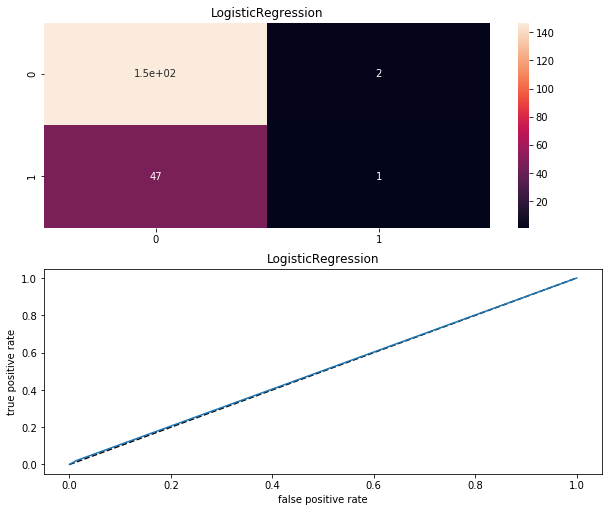




**************** GaussianNB ****************


GaussianNB(priors=None, var_smoothing=1e-09)


ACCURACY SCORE IS =  0.7563451776649747


CROSS_VAL_SCORE =  0.7502782931354359


ROC_AUC_SCORE =  0.5070609619686801


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.76      0.99      0.86       149
           1       0.50      0.02      0.04        48

    accuracy                           0.76       197
   macro avg       0.63      0.51      0.45       197
weighted avg       0.70      0.76      0.66       197



CONFUSION MATRIX [[148   1]
 [ 47   1]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


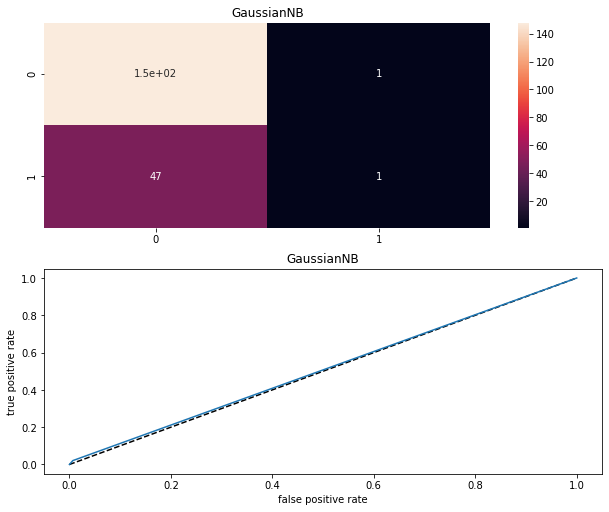




**************** SVC ****************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


ACCURACY SCORE IS =  0.766497461928934


CROSS_VAL_SCORE =  0.7594413522984952


ROC_AUC_SCORE =  0.5278942953020134


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.77      0.99      0.87       149
           1       0.75      0.06      0.12        48

    accuracy                           0.77       197
   macro avg       0.76      0.53      0.49       197
weighted avg       0.76      0.77      0.68       197



CONFUSION MATRIX [[148   1]
 [ 45   3]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


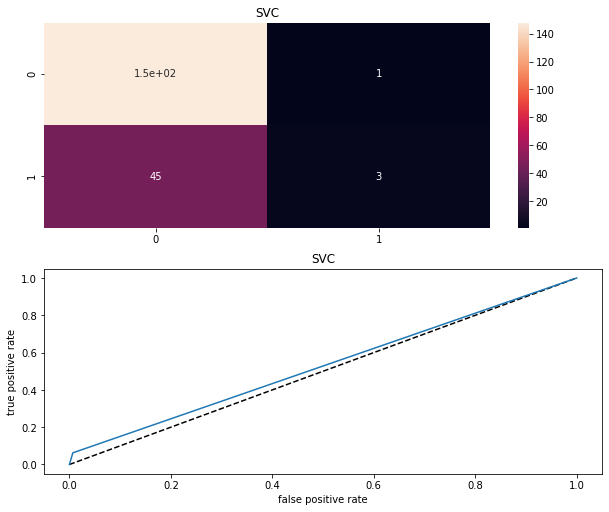




**************** DecisionTreeClassifier ****************


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')


ACCURACY SCORE IS =  0.6243654822335025


CROSS_VAL_SCORE =  0.6462172747887034


ROC_AUC_SCORE =  0.49748322147651


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.76      0.74      0.75       149
           1       0.24      0.25      0.24        48

    accuracy                           0.62       197
   macro avg       0.50      0.50      0.50       197
weighted avg       0.63      0.62      0.63       197



CONFUSION MATRIX [[111  38]
 [ 36  12]]

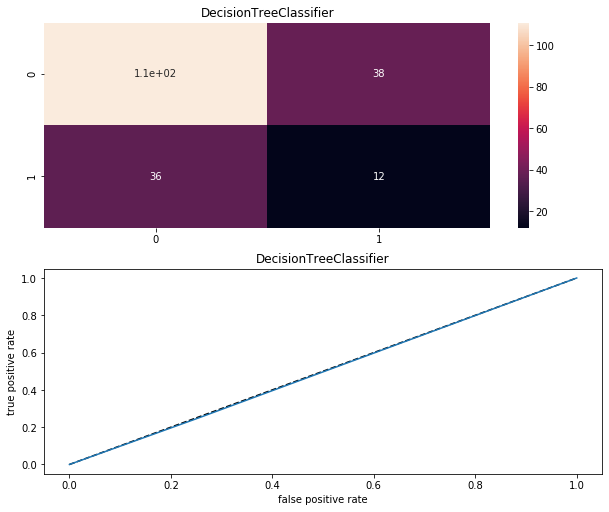




**************** KNeighborsClassifie ****************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


ACCURACY SCORE IS =  0.700507614213198


CROSS_VAL_SCORE =  0.7023500309214594


ROC_AUC_SCORE =  0.5195749440715884


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.76      0.87      0.82       149
           1       0.30      0.17      0.21        48

    accuracy                           0.70       197
   macro avg       0.53      0.52      0.51       197
weighted avg       0.65      0.70      0.67       197



CONFUSION MATRIX [[130  19]
 [ 40   8]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


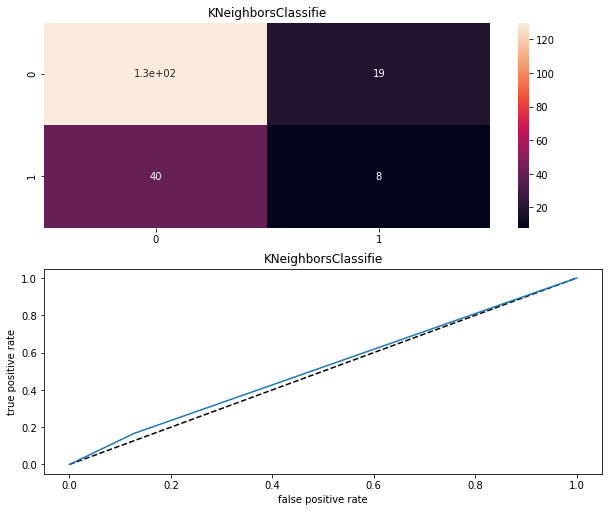

In [194]:
Model = []
score = []
cvs = []
rocscore = []
for name,model in models:
    print('****************',name,'****************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS= accuracy_score(y_test,pred)
    print('ACCURACY SCORE IS = ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('CROSS_VAL_SCORE = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('ROC_AUC_SCORE = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('CLASSIFICATION REPORT = ',classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print('CONFUSION MATRIX',cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(false_positive_rate,true_positive_rate,label='AUC= %.2f'% roc_auc)
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title(name)
    plt.show()
    print('\n\n')

# Results:

In [195]:
result=pd.DataFrame({'Model': Model,'Accuracy_score': score,'Cross_val_score': cvs,'Roc_auc_curve': rocscore})
result

Model  Accuracy_score  Cross_val_score  Roc_auc_curve
0      LogisticRegression       75.126904        75.330860      50.370526
1              GaussianNB       75.634518        75.027829      50.706096
2                     SVC       76.649746        75.944135      52.789430
3  DecisionTreeClassifier       62.436548        64.621727      49.748322
4     KNeighborsClassifie       70.050761        70.235003      51.957494

Through the above resuls we can see that Logistic regression is performing the best pridiction accuracy rate till now. Hence we will try other methords also in order to enhance the accuracy score for the given dataset.

# RandomForestRegressor

In [196]:
rfr1=RandomForestRegressor(bootstrap=True,max_features='log2',min_samples_split=2,n_estimators=500)
rfr1.fit(x_train, y_train)
rfr1.score(x_train,y_train)

0.8589520101351351

In [197]:
pred=rfr1.predict(x_test)
pred

array([0.312, 0.26 , 0.21 , 0.344, 0.36 , 0.158, 0.534, 0.198, 0.274,
       0.144, 0.418, 0.368, 0.264, 0.238, 0.212, 0.204, 0.128, 0.094,
       0.174, 0.172, 0.388, 0.256, 0.238, 0.258, 0.128, 0.212, 0.294,
       0.176, 0.128, 0.346, 0.33 , 0.238, 0.284, 0.262, 0.204, 0.334,
       0.042, 0.566, 0.216, 0.254, 0.226, 0.356, 0.22 , 0.122, 0.172,
       0.42 , 0.06 , 0.212, 0.404, 0.268, 0.434, 0.468, 0.294, 0.204,
       0.414, 0.23 , 0.23 , 0.172, 0.282, 0.318, 0.34 , 0.066, 0.148,
       0.388, 0.206, 0.082, 0.226, 0.118, 0.304, 0.174, 0.304, 0.434,
       0.302, 0.338, 0.234, 0.38 , 0.274, 0.112, 0.248, 0.23 , 0.088,
       0.248, 0.44 , 0.246, 0.256, 0.254, 0.234, 0.134, 0.254, 0.33 ,
       0.368, 0.396, 0.464, 0.29 , 0.14 , 0.054, 0.328, 0.132, 0.292,
       0.318, 0.228, 0.164, 0.154, 0.288, 0.384, 0.286, 0.406, 0.14 ,
       0.164, 0.424, 0.316, 0.546, 0.262, 0.29 , 0.206, 0.438, 0.244,
       0.1  , 0.304, 0.08 , 0.204, 0.192, 0.242, 0.116, 0.108, 0.172,
       0.19 , 0.25 ,

# RandomForestClassifier

In [198]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
R_for= RandomForestClassifier(n_estimators = 500)
modelR= R_for.fit(x_train, y_train)

# Predictions
pred_2 = modelR.predict(x_test)

print ("The accuracy of model 2 : ",accuracy_score(y_test, pred_2))
print ("The f1 score of model 2 : ", f1_score(y_test, pred_2, average = 'binary'))

The accuracy of model 2 :  0.7563451776649747
The f1 score of model 2 :  0.07692307692307693


In [199]:
print("Mean r2 score for RandomForestRegressor: ",cross_val_score(rfr1,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for RandomForestRegressor: ",cross_val_score(rfr1,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for RandomForestClassifier: ",cross_val_score(R_for,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for RandomForestClassifier: ",cross_val_score(R_for,x,y,cv=5,scoring="r2").std())

Mean r2 score for RandomForestRegressor:  -0.02176601627485366
Standard Deviation r2 score for RandomForestRegressor:  0.052709331640083075


Mean r2 score for RandomForestClassifier:  -0.31838911058709746
Standard Deviation r2 score for RandomForestClassifier:  0.027562964725561075


# Choosing a Model:

I am going to choose Random Forest Regressor as my final and the best model as it is predicting the highest accuracy score i.e. 86.28% which is highest among all the model tested above. We have also seen that Logistic Regression has shown a promising result with 76.64% .

Therefore Random Forest Regressor is going to predict the best result for us.

# Saving the model:

In [200]:
from sklearn.externals import joblib

In [201]:
joblib.dump(rfr1,'Project_11_Automobile_Insurance_claim_Analysis_2.obj')

['Project_11_Automobile_Insurance_claim_Analysis_2.obj']

In [202]:
#loading back the model:
model=joblib.load('Project_11_Automobile_Insurance_claim_Analysis_2.obj')

In [203]:
#Pridicting x_test Random Forest Regressor = R_for
rfr1.predict(x_test)

array([0.312, 0.26 , 0.21 , 0.344, 0.36 , 0.158, 0.534, 0.198, 0.274,
       0.144, 0.418, 0.368, 0.264, 0.238, 0.212, 0.204, 0.128, 0.094,
       0.174, 0.172, 0.388, 0.256, 0.238, 0.258, 0.128, 0.212, 0.294,
       0.176, 0.128, 0.346, 0.33 , 0.238, 0.284, 0.262, 0.204, 0.334,
       0.042, 0.566, 0.216, 0.254, 0.226, 0.356, 0.22 , 0.122, 0.172,
       0.42 , 0.06 , 0.212, 0.404, 0.268, 0.434, 0.468, 0.294, 0.204,
       0.414, 0.23 , 0.23 , 0.172, 0.282, 0.318, 0.34 , 0.066, 0.148,
       0.388, 0.206, 0.082, 0.226, 0.118, 0.304, 0.174, 0.304, 0.434,
       0.302, 0.338, 0.234, 0.38 , 0.274, 0.112, 0.248, 0.23 , 0.088,
       0.248, 0.44 , 0.246, 0.256, 0.254, 0.234, 0.134, 0.254, 0.33 ,
       0.368, 0.396, 0.464, 0.29 , 0.14 , 0.054, 0.328, 0.132, 0.292,
       0.318, 0.228, 0.164, 0.154, 0.288, 0.384, 0.286, 0.406, 0.14 ,
       0.164, 0.424, 0.316, 0.546, 0.262, 0.29 , 0.206, 0.438, 0.244,
       0.1  , 0.304, 0.08 , 0.204, 0.192, 0.242, 0.116, 0.108, 0.172,
       0.19 , 0.25 ,